# Take-home exam 2d-visualization MVE080/MMG640

This notebook contains the questions for the take-home exam in the course Scientific visualization Autumn MVE080/MMG640. Provide the answers in the notebook and then upload the notebook as a html on Canvas.

**Important** - make sure to hand in the exam in time. You will have 24 hours (00:00-23:59) on 14-12-2022 to complete the exam. Late hands in will not be accepted. 

**Important** - you are not allowed to collaborate or do plagiarism by using available text/code on the internet. In case we detect plagiarism you will receive a failing grade.

**Important** - make sure that you complete and provide an answer to all the questions on the exam. In every code cell and cell on the format; *Provide answer here*, you should provide an answer. 

## Grading criteria

The grade on this take-home exam is either pass or fail. When correcting the exam I will look for the following things:

1. That the produced visual is readable. 
2. That given the task the visual effectively communicates the intended main message. 
3. That any potential motivations to why a visual is readable or not is correct. 
4. That appropriate colors have been used.

## Other information

You are allowed to use either R or Python to answer the questions below (both have notebook support). You are further allowed to use any plotting library you want. The code-snippet below loads the packages we primarily have used throughout the course.


In [2]:
# To load required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
import geopandas as gpd

# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#F0E442", "#0072B2", "#D55E00", 
             "#CC79A7", "#999999"]

## Question 1 

During the course we have talked about colormaps for categorical and quantitative data. One type of colormap we have discussed is the divergent colormap. Below answer the following **three** questions:

1. Explain when it is suitable to use a divergent colormap.
2. Create a visual below where it is suitable to use a divergent colormap. You are allowed to reuse any visual you have created in the homework, or to create a new visual using any of the datasets available on Canvas. **You are not allowed to use any of the visuals from the lecture slides**. 
3. Motivate which message a divergent colormap helps to highlight in the created visual.


Divergent colormaps should be used when the information being plotted has a critical middle value and you want to emphasize the values above and below this middle value, one example of such a case is topography.

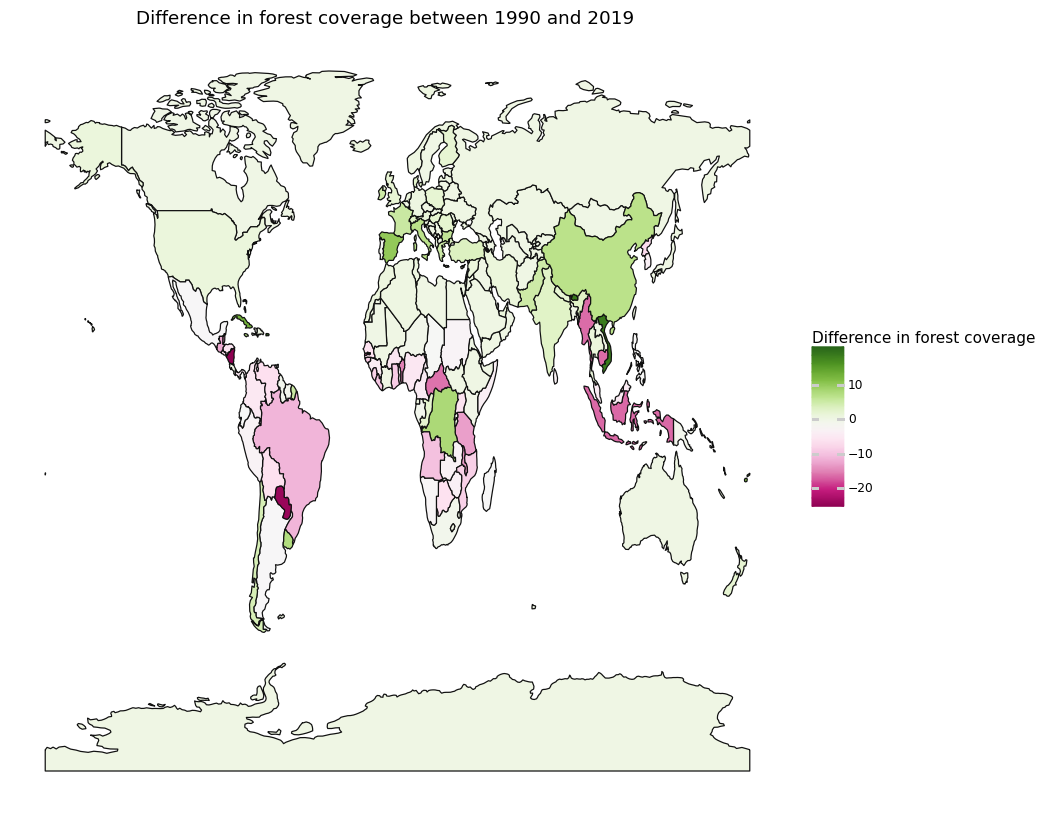

<ggplot: (200633151485)>

In [8]:
# Insert code for the visual here

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
dff_90 = pd.read_csv('Forest_1990.csv')
dff_19 = pd.read_csv('Forest_2019.csv')

diff = pd.DataFrame(dff_19['Country'], columns=['Country'])
diff['diff'] = dff_19['2019_forest'] - dff_90['1990_forest']

countries_with_data = list(diff['Country'])

for c in world['name']:
    if c in countries_with_data:
        d = diff.loc[diff['Country']==c, 'diff']
        d = d.values[0]
        world.loc[world['name']==c, 'diff'] = d
    else:
        world.loc[world['name']==c, 'diff'] = 0
    
# data_plot = asia.merge(starbucks_stores, left_on="iso_a3", right_on="iso_a3") will give you a dataset you can work with

p = (ggplot(world)
    + geom_map(aes(geometry='geometry', fill='diff'))
    + scale_fill_cmap('PiYG', name='Difference in forest coverage')
    + theme(panel_background=element_rect(fill = "white"), 
            axis_ticks=element_blank(), 
            axis_text=element_blank(),
            figure_size=(10,10))
    + labs(title='Difference in forest coverage between 1990 and 2019')
    
    
    )
p


# Do not forget to print the visual 

Here the divergent colormap helps drive home the message that countries in the northern hemisphere have either maintained the same or increased their forest coverage since 1990. While the opposite is basically true with some exception for countries in the southern hemisphere. 

## Question 2

Below, a made-up example on proportion data showing book genre people prefer for the years 1990, 2000, and 2010 is given. Data are plotted as pie-charts. Answer the following **two** questions: 

1. Motivate why a pie-chart is ill-suited if we want to see how the proportion that prefer a certain genre, e.g. horror, has changed over time.
2. Create a visual from where it is easy to see how the proportion that prefer a certain genre has changed over the years. When creating the new visual, use appropriate colors. 

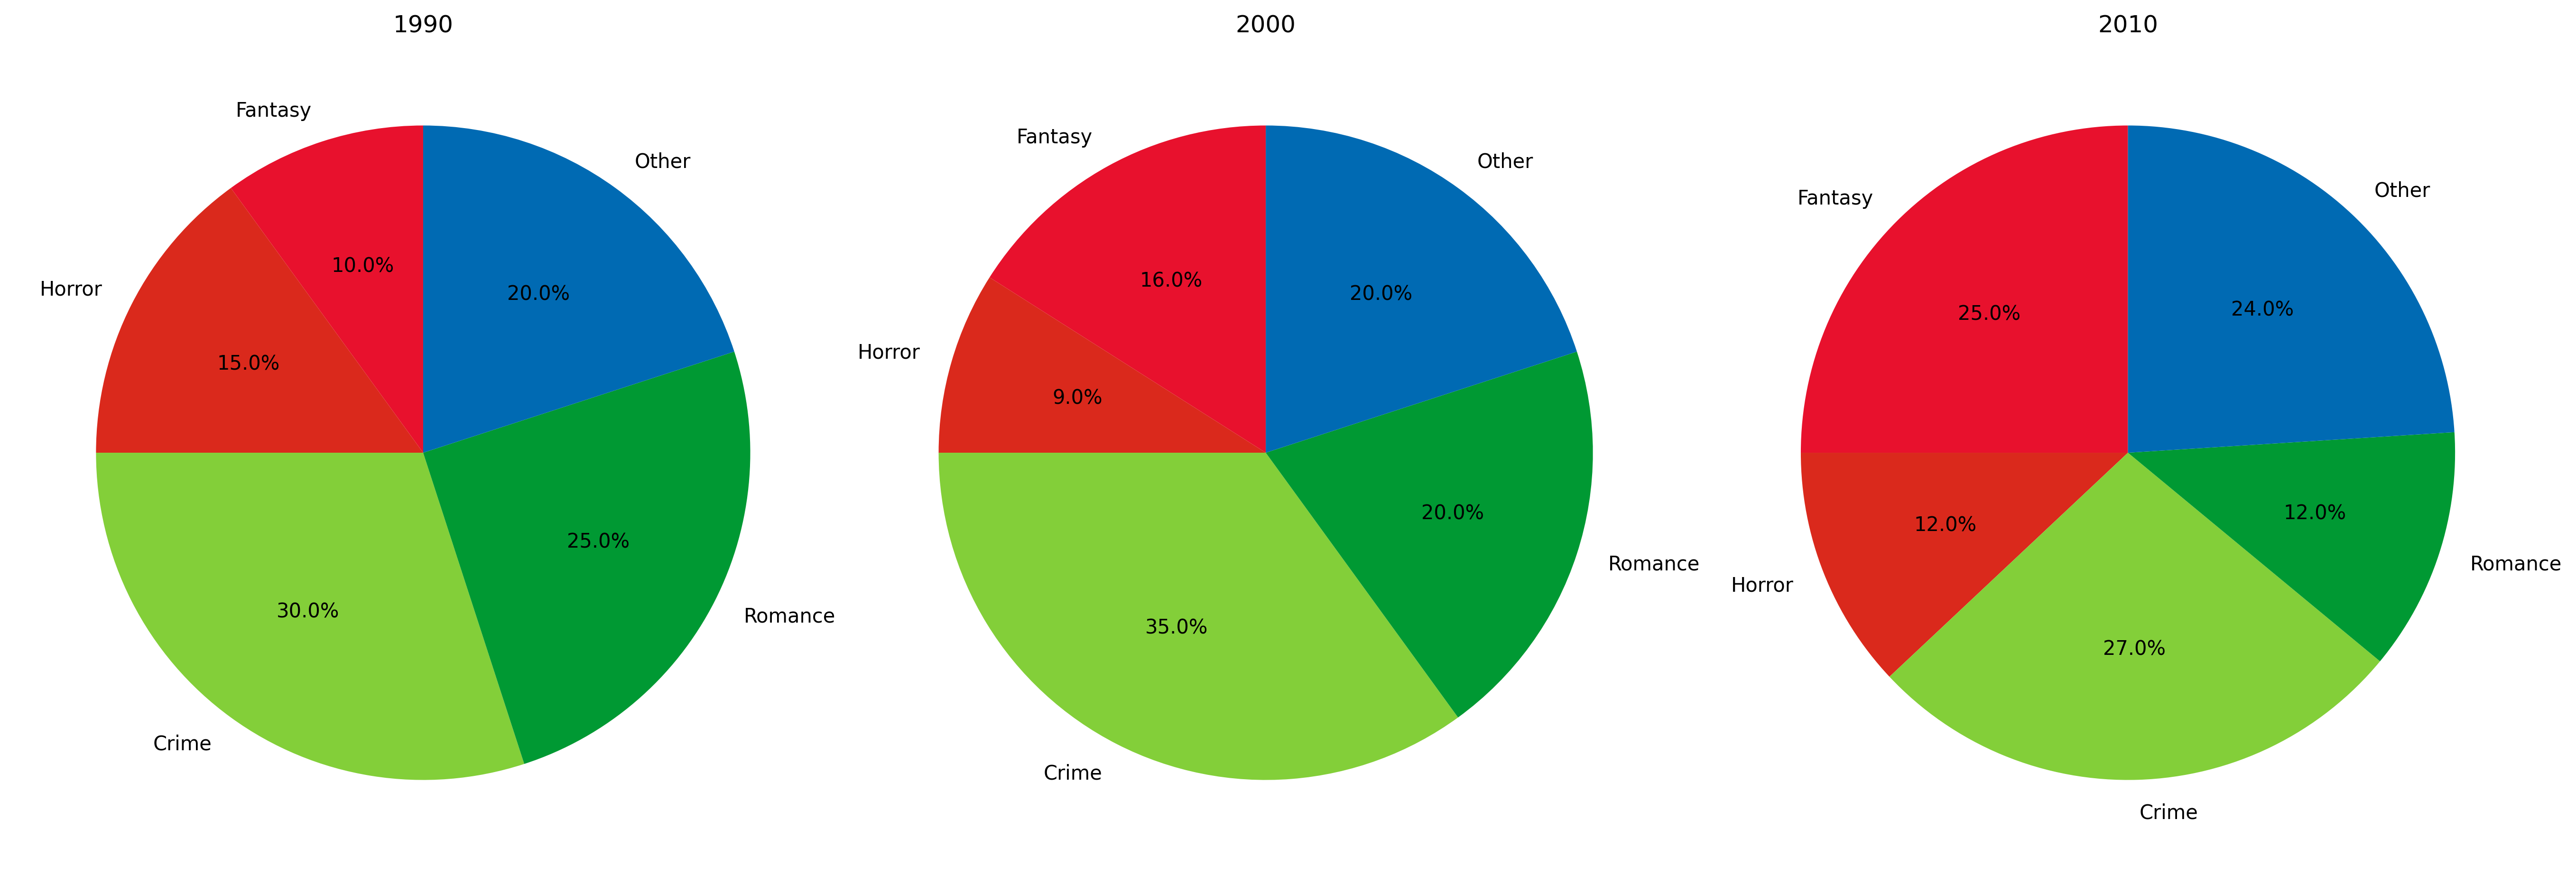

In [9]:
data_1990 = pd.DataFrame({"Genre" : ["Fantasy", "Horror", "Crime", "Romance", "Other"],
                          "Proportion" : [10, 15, 30, 25, 20],
                          "Year" : [1990, 1990, 1990, 1990, 1990], 
                          "Color" : ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3"]})
data_2000 = pd.DataFrame({"Genre" : ["Fantasy", "Horror", "Crime", "Romance", "Other"],
                          "Proportion" : [16, 9, 35, 20, 20],
                          "Year" : [2000, 2000, 2000, 2000, 2000], 
                          "Color" : ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3"]})                                 
data_2010 = pd.DataFrame({"Genre" : ["Fantasy", "Horror", "Crime", "Romance", "Other"],
                          "Proportion" : [25, 12, 27, 12, 24],
                          "Year" : [2010, 2010, 2010, 2010, 2010], 
                          "Color" : ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3"]})                                                    



fig, axs = plt.subplots(1, 3, constrained_layout=True, dpi=300, figsize=(18, 10))

axs[0].pie(data_1990["Proportion"], 
        labels=data_1990["Genre"], 
        colors = data_1990["Color"], 
        autopct='%1.1f%%',
        startangle=90.0)
axs[0].set_title("1990")

axs[1].pie(data_2000["Proportion"], 
        labels=data_2000["Genre"], 
        colors = data_2000["Color"], 
        autopct='%1.1f%%',
        startangle=90.0)
axs[1].set_title("2000")

axs[2].pie(data_2010["Proportion"], 
        labels=data_2010["Genre"], 
        colors = data_2010["Color"], 
        autopct='%1.1f%%',
        startangle=90.0)
axs[2].set_title("2010")

plt.show()


In the visual above it is very hard to visually see the difference between proportion over the years since humans are worse at comparing areas than one dimensional quantities. Without the percentages written out as they are now it is almost impossible to see the difference for crime between 1990 and 2000. The color for Horror is also a bit too similar to Fantasys color in my opinion

     Genre  Proportion  Year    Color
0  Fantasy          10  1990  #E8112d
1   Horror          15  1990  #DA291C
2    Crime          30  1990  #83CF39
3  Romance          25  1990  #009933
4    Other          20  1990  #006AB3
0  Fantasy          16  2000  #E8112d
1   Horror           9  2000  #DA291C
2    Crime          35  2000  #83CF39
3  Romance          20  2000  #009933
4    Other          20  2000  #006AB3
0  Fantasy          25  2010  #E8112d
1   Horror          12  2010  #DA291C
2    Crime          27  2010  #83CF39
3  Romance          12  2010  #009933
4    Other          24  2010  #006AB3


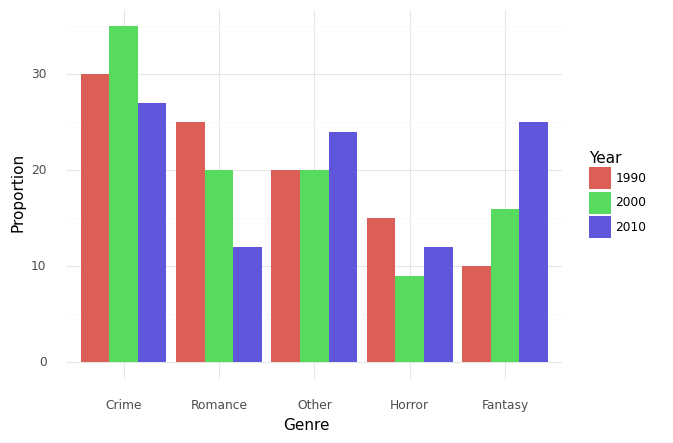

In [181]:
# Insert code for the visual here

# concat the datasets


df_book = pd.concat([data_1990, data_2000, data_2010])
print(df_book)

order = ['Crime', 'Romance', 'Other', 'Horror', 'Fantasy']

df_book = df_book.assign(Genre = pd.Categorical(df_book['Genre'], categories=order))
df_book = df_book.assign(Year = pd.Categorical(df_book['Year'], categories=[1990, 2000, 2010]))

cmap = ['#83CF39', '#009933','#006AB3','#DA291C','#E8112d']


p = (ggplot(df_book, aes('Genre', 'Proportion', group='Year', fill='Year'))
    + geom_bar(position='dodge', stat='identity')
#     + coord_flip() 
    + theme_minimal()
    )
print(p)

# Do not forget to print the visual 

## Question 3

On Canvas two different ways to plot the uncertainty for a curve fit are given. Which visual would you use for a lay audience (that is an audience not trained in statistics). Motivate!


The message we want to deliver to the audience is "for exactly these points the this line is the best approximation but there is some uncertainty to if it is exactly this line". To deliver this message I would use the second plot, the one with the red best fit along with different blue lines that also fits the points well. This alternative, I think, is better for driving home the message for an audience of non statistically-versed individuals that the red line is the best approximation for this set of discreet points but that any of the other blue lines could be the true function. I avoid using the confidence intervals since it extremely easy to misunderstand their meaning, even if you have worked with them extensively.


## Question 4

On Canvas you have a heatmap showing forest coverage for various countries from 1970 to 2019. Answer the following **two** questions:

1. Using the dataset on Canvas recreate the visual, but, with a better suited colormap
2.  Motivate why your new colormap is an appropriate choice for this visual.

**Note**. When recreating the visual you do not need to have the countries in the same order on the y-axis as I do.


       country  Year  Forest_coverage  Val_1990     ratio
0    Argentina  1990             12.9      12.9  1.000000
1    Argentina  1991             12.8      12.9  0.992248
2    Argentina  1992             12.7      12.9  0.984496
3    Argentina  1993             12.7      12.9  0.984496
4    Argentina  1994             12.6      12.9  0.976744
..         ...   ...              ...       ...       ...
325     Sweden  2015             68.7      68.9  0.997097
326     Sweden  2016             68.7      68.9  0.997097
327     Sweden  2017             68.7      68.9  0.997097
328     Sweden  2018             68.7      68.9  0.997097
329     Sweden  2019             68.7      68.9  0.997097

[330 rows x 5 columns]


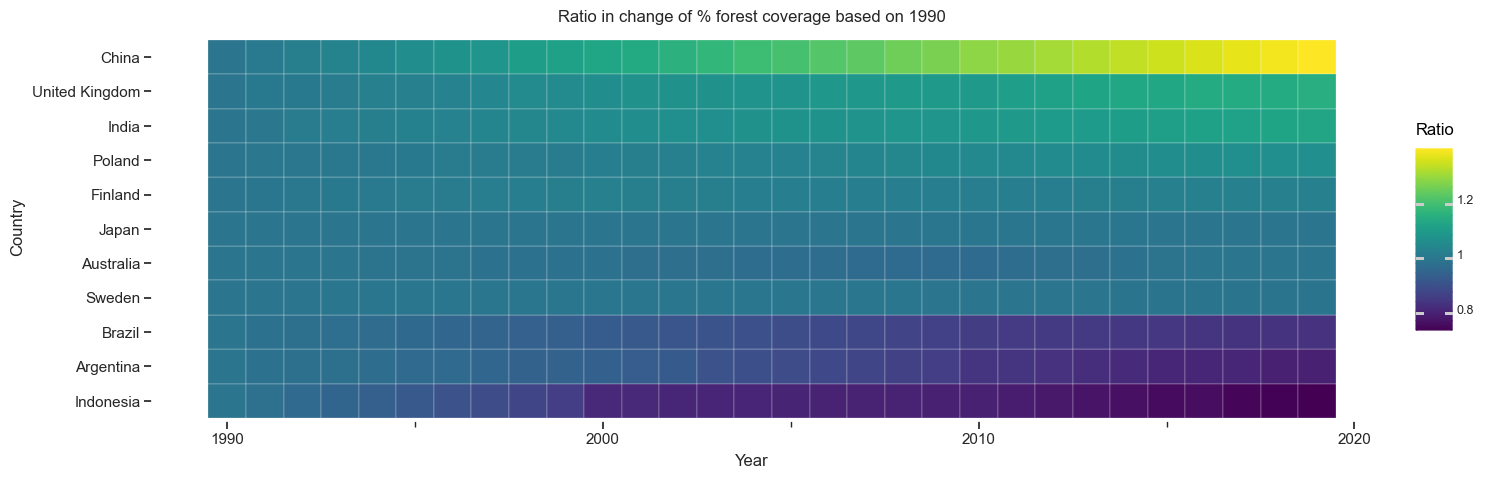

<ggplot: (200643686132)>

In [81]:
# Insert code for the visual here
df_hm = pd.read_csv('Forest_tidy-1.csv')
print(df_hm)

order_df = df_hm.query('Year == 2019')
pos = order_df["country"].values[np.argsort(order_df["ratio"])]


df_hm = df_hm.assign(country = pd.Categorical(df_hm['country'], categories=pos))

p  = (ggplot(df_hm, aes('Year', 'country', fill='ratio'))
      + geom_tile(color='white')
      + labs(x='Year', y='Country', title='Ratio in change of % forest coverage based on 1990', fill='Ratio')
#       + scale_fill_continuous('RdYlGn')
      + theme_seaborn()
      + theme(figure_size=(16, 5), 
              panel_background=element_rect(fill = "white")
             )
#       + guides(fill = guide_legend(title='OperationSystem',title_position='left'))
     )
p


# Do not forget to print the visual 

This is a more appropriate visual since there are so many small differences between the datapoints so it becomes much easier to dechipher the take home message, which in my meaning is that Brazil, Argentina and indonesia have decreased while China (UK and India somewhat) have increased their forest coverage.

## Question 5

On Canvas there is a made-up dataset with temperature data for each day of the year. Using this dataset answer the following **two** questions: 
1. Visualize the data such that we can clearly see the median temperature and temperature distribution for each month. 
2. Comment on any particular features of the temperature distribution for September.

    month      temp  day
0     Jan -0.795541    1
1     Jan  1.760279    2
2     Jan  0.734198    3
3     Jan -0.793634    4
4     Jan -3.701784    5
..    ...       ...  ...
360   Dec  4.145816   27
361   Dec  2.253141   28
362   Dec  0.993611   29
363   Dec  3.852919   30
364   Dec  3.474768   31

[365 rows x 3 columns]


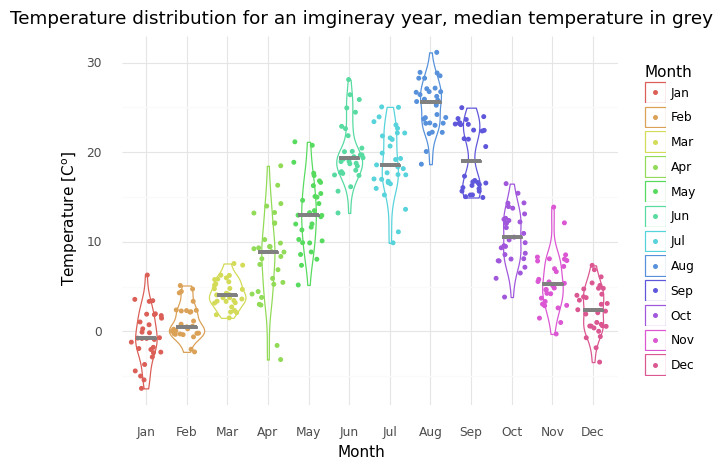

<ggplot: (200643833158)>

In [182]:
# Insert code for the visual here
dft = pd.read_csv('Temperature.csv')
print(dft)

# add mean to dataframe
order = []
for m in dft['month'].unique():
    tmp = dft.query('month == @m')
    dft.loc[dft['month'] == m , 'mean'] = tmp['temp'].median()
    order.append(m)

dft = dft.assign(month = pd.Categorical(dft['month'], categories=order))
p = (ggplot(dft, aes('month', color='month'))
     + geom_violin(mapping=aes('month', 'temp'), fill='white', alpha=0.7)
     + geom_jitter(mapping=aes('month', 'temp'), size=1)
     + geom_crossbar(aes(x='month',y='mean',ymin='mean',ymax='mean'), color='grey', alpha=0.7)
     + labs(x = 'Month', y='Temperature [$\mathrm{C}^{\mathrm{o}}$]', color='Month',
           title = 'Temperature distribution for an imgineray year, median temperature in grey')
     
     + theme_minimal()
    )
p
# Do not forget to print the visual 

For Septembers distribution we see that it is split into two groups on either side if the median ($\approx 19$). Here it was important that the points where also plotted since otherwise from just the mean and violin plot we are led to believe that there are points between the group.

## Question 6

A colleague of mine suggested that apartment prices in Sweden increase with population size. Using the dataset on Canvas create a visual which clearly shows the relationship between apartment prices and Sweden's population over time.

   country.x  Year  Population country.y  Unemployment  price
0     Sweden  1996     8860000    Sweden          9.55   4997
1     Sweden  1997     8870000    Sweden         10.40   5896
2     Sweden  1998     8870000    Sweden          8.94   6633
3     Sweden  1999     8870000    Sweden          7.61   7777
4     Sweden  2000     8880000    Sweden          5.47   8314
5     Sweden  2001     8900000    Sweden          4.73   9436
6     Sweden  2002     8920000    Sweden          4.97   9818
7     Sweden  2003     8950000    Sweden          5.55  10938
8     Sweden  2004     8990000    Sweden          6.69  12421
9     Sweden  2005     9040000    Sweden          7.49  15293
10    Sweden  2006     9100000    Sweden          7.07  18653
11    Sweden  2007     9160000    Sweden          6.16  20632
12    Sweden  2008     9240000    Sweden          6.23  19536
13    Sweden  2009     9310000    Sweden          8.35  20709
14    Sweden  2010     9390000    Sweden          8.61  22795
15    Sw

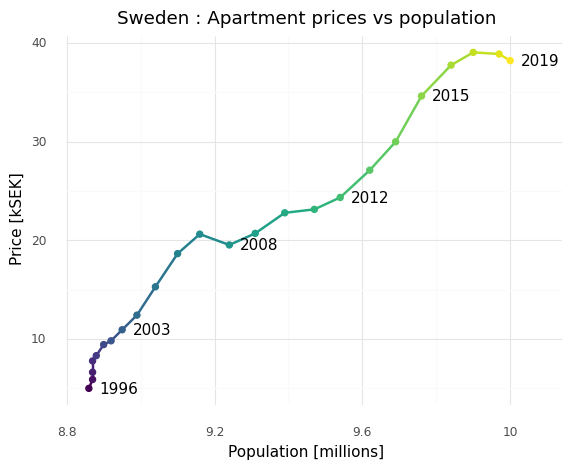

In [134]:
# Insert code for the visual here

dfa = pd.read_csv('Pop_house_price.csv')
print(dfa)
years = [1996, 2003, 2008, 2012, 2015, 2019]
labels = ['1996', '2003', '2008', '2012', '2015', '2019']
breaks = dfa.query('Year in @years')

p = (ggplot(dfa, aes(x='price/1000', y='Population/1000000', color='Year'))
    
    +geom_path(show_legend=False, size=1)
    +geom_point(show_legend=False, size=2)
    +labs(x='Price [kSEK]', y='Population [millions]', title='Sweden : Apartment prices vs population')
    +geom_text(data=breaks,  
               mapping=aes('price/1000', 'Population/1000000', label=labels),
               show_legend=False,
               nudge_y=0.08,
               color='black'
              )
     +coord_flip()
     +theme_minimal()
    )
print(p)


# Do not forget to print the visual 

## Question 7

On Canvas, you can find a dataset with inflation adjusted GDP per capita for several countries between 1920 and 2010. Using this dataset answer the following **three** questions: 
1. Select one question you want to investigate with a visual. 
2. Create that visual using data from at least two years and two countries. 
3. Motivate why your choice if visual is suitable to investigate your question. 

*Provide which question you want to investigate with a visual*

      continent  Year          mean
0        Africa  1921   1160.685185
1        Africa  1922   1178.888889
2        Africa  1923   1194.500000
3        Africa  1924   1210.166667
4        Africa  1925   1225.240741
...         ...   ...           ...
14845    Sweden  2006  47300.000000
14846    Sweden  2007  48600.000000
14847    Sweden  2008  48000.000000
14848    Sweden  2009  45500.000000
14849    Sweden  2010  47800.000000

[540 rows x 3 columns]


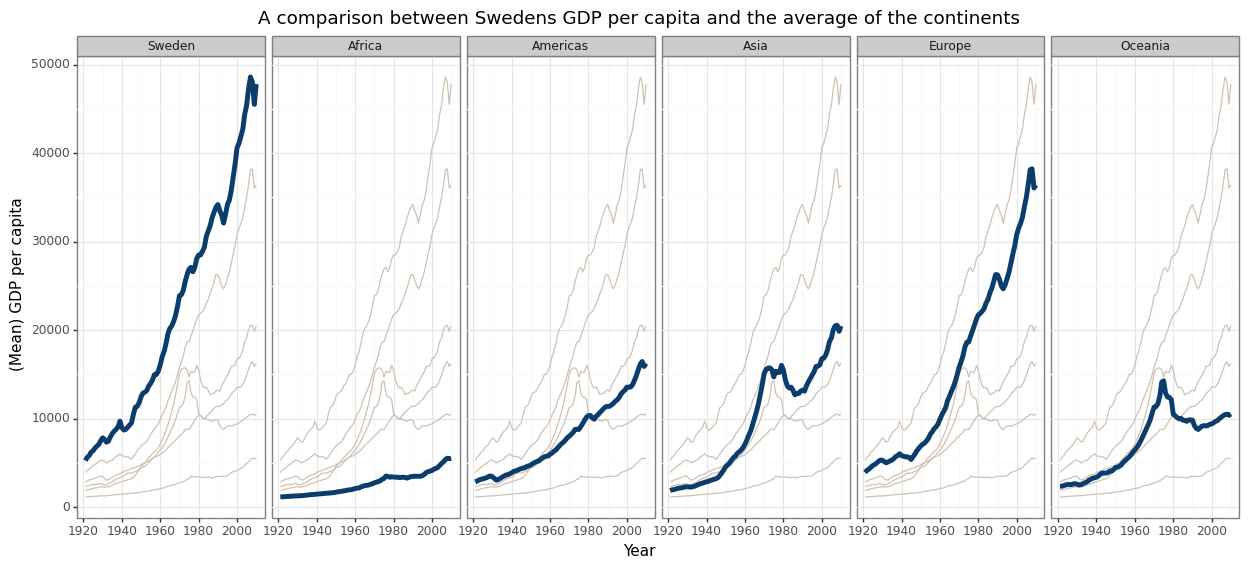

<ggplot: (200653280862)>

In [180]:
# Insert code for the visual here
df_gdp = pd.read_csv('Data_gdp_per_capita.csv')
df_swe = df_gdp.query("country == 'Sweden'")
df_swe = pd.DataFrame(df_swe)
df_swe.loc[:,'continent'] = 'Sweden'
df_swe = df_swe.rename({'GDP_per_capita' : 'mean'}, axis='columns')
df_swe = df_swe.drop('country', axis='columns')

# I want to investigate how the gdppc varies based on continent

df_sum = df_gdp.groupby(['continent', 'Year'])['GDP_per_capita'].agg(['mean'])
df_sum = df_sum.reset_index()
df_sum = pd.concat([df_sum, df_swe])

df_sum = df_sum.assign(continent = pd.Categorical(df_sum['continent'], 
                                                  categories = ['Sweden', 'Africa', 'Americas', 'Asia', 'Europe', 'Oceania']))
print(df_sum)
col_highlight = ["#D0C0B0", "#0A3D6B", "#B6C2CC", "#BEAAB4", "#ECE9CD", "#0D5C3D", "#812F02"]
df2 = df_sum.copy()
df2['continent_copy'] = df2['continent']
df2 = df2.drop('continent', axis=1)
# print(df2)
p = (ggplot(df_sum, aes('Year', 'mean'))
    + geom_line(data=df2, mapping=aes(x='Year', y='mean', group='continent_copy'), size=0.5, color=col_highlight[0])
    + geom_line(aes(group='continent'), color=col_highlight[1], size=2)
    + facet_wrap('~continent', nrow=1)
    + labs(x='Year', y='(Mean) GDP per capita', title='A comparison between Swedens GDP per capita and the average of the continents')
    + theme_bw()
    + theme(figure_size=(15,6))
    
    )
p

# Do not forget to print the visual 

My question was how the GDP per capita for the different countries differed between each other and Sweden. This visual makes it easy to compare any two lines without cluttering the screen with color. It is however important to note that comparing a mean to a single number without providing measures of unceartainity in the mean one should be careful about drawing conclusions, as one always should when looking at graphs and not performing statistical tests:).